## POINTS 1-3)

In [217]:
# Libraries
#change1
import os
import sqlite3
import fnmatch
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import folium.plugins
from folium import plugins
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from pstats import Stats
#from pstats import StatsProfile
from datetime import datetime
from array import array
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pylab as py

# Settings for seaborn
#sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [218]:
# Create data base
conn = sqlite3.connect('fuel_database.db') 
cursor = conn.cursor()

In [219]:
# Query the SQL-table
cursor.execute('''SELECT * FROM fuel_table''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['date','brand','address','diesel_price','bleifrei_price','lat','lon'])    

df

,date,brand,address,diesel_price,bleifrei_price,lat,lon
0,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743
1,28.10.2022,Socar Gotthard,"A2 West, 6467 Schattdorf",2.395,2.035,47.228649,7.621632
2,14.08.2022,BP Rheintal,"Autobahn A13, 9470 Buchs SG",2.380,2.200,NaN,NaN
3,11.07.2022,eni - Castasegna Ovest,"Farzett, 7608 Castasegna",2.380,2.230,47.285664,8.563127
4,03.08.2022,BP,"Grüningerstr. 80, 8624 Grüt (Gossau ZH)",2.370,2.220,47.448483,8.926337
...,...,...,...,...,...,...,...
2400,04.05.2016,Auto Bellinzona Nord Sagl,"Via S. Gottardo 57B, 6500 Bellinzona",1.320,1.330,NaN,NaN
2401,02.02.2016,Reisch AG,"Hauptstr. 24, 8573 Siegershausen",1.320,1.270,NaN,NaN
2402,04.05.2016,Auto Lugano,"Via Cantonale, 6983 Magliaso",1.319,1.279,NaN,NaN
2403,22.12.2020,Ruedi Rüssel,"Luzernstr. 60, 4553 Subingen",1.310,1.260,NaN,NaN


In [220]:
difference = []
for index, row in df.iterrows():
    difference.append(round(row['diesel_price'] - row['bleifrei_price'], 2))

df['difference'] = difference

df

,date,brand,address,diesel_price,bleifrei_price,lat,lon,difference
0,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743,-0.02
1,28.10.2022,Socar Gotthard,"A2 West, 6467 Schattdorf",2.395,2.035,47.228649,7.621632,0.36
2,14.08.2022,BP Rheintal,"Autobahn A13, 9470 Buchs SG",2.380,2.200,NaN,NaN,0.18
3,11.07.2022,eni - Castasegna Ovest,"Farzett, 7608 Castasegna",2.380,2.230,47.285664,8.563127,0.15
4,03.08.2022,BP,"Grüningerstr. 80, 8624 Grüt (Gossau ZH)",2.370,2.220,47.448483,8.926337,0.15
...,...,...,...,...,...,...,...,...
2400,04.05.2016,Auto Bellinzona Nord Sagl,"Via S. Gottardo 57B, 6500 Bellinzona",1.320,1.330,NaN,NaN,-0.01
2401,02.02.2016,Reisch AG,"Hauptstr. 24, 8573 Siegershausen",1.320,1.270,NaN,NaN,0.05
2402,04.05.2016,Auto Lugano,"Via Cantonale, 6983 Magliaso",1.319,1.279,NaN,NaN,0.04
2403,22.12.2020,Ruedi Rüssel,"Luzernstr. 60, 4553 Subingen",1.310,1.260,NaN,NaN,0.05


In [221]:
### EDA part2

## EDA

### Univariate non-graphical

In [222]:
df.describe()

,diesel_price,bleifrei_price,lat,lon,difference
count,2405.000000,2405.000000,1758.000000,1758.000000,2405.000000
mean,1.823983,1.682839,47.079531,8.346149,0.141139
std,0.284428,0.218636,0.453694,0.793183,0.103981
min,1.120000,1.140000,45.833527,5.971094,-0.140000
25%,1.570000,1.500000,46.894756,7.708704,0.060000
50%,1.770000,1.679000,47.200623,8.451691,0.100000
75%,2.090000,1.840000,47.418551,8.929591,0.200000
max,2.395000,2.230000,47.792210,10.455905,0.500000


In [223]:
# Preis Diesel
print('Preis:',
      'Count:', round(df.diesel_price.count(), 1),
      'Min:', round(df.diesel_price.min(), 1),
      'Max:', round(df.diesel_price.max(), 1),
      'Mean:', round(df.diesel_price.mean(), 1),
      'Median:', round(df.diesel_price.median(), 1),
      'Std:', round(df.diesel_price.std(), 1))

# Preis Bleifrei
print('Preis2:',
      'Count:', round(df.bleifrei_price.count(), 1),
      'Min:', round(df.bleifrei_price.min(), 1),
      'Max:', round(df.bleifrei_price.max(), 1),
      'Mean:', round(df.bleifrei_price.mean(), 1),
      'Median:', round(df.bleifrei_price.median(), 1),
      'Std:', round(df.bleifrei_price.std(), 1))

Preis: Count: 2405 Min: 1.1 Max: 2.4 Mean: 1.8 Median: 1.8 Std: 0.3
Preis2: Count: 2405 Min: 1.1 Max: 2.2 Mean: 1.7 Median: 1.7 Std: 0.2


In [224]:
df.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,diesel_price,bleifrei_price,lat,lon,difference
0.05,1.42,1.35,46.08,7.05,0.02
0.10,1.47,1.40,46.30,7.23,0.04
0.25,1.57,1.50,46.89,7.71,0.06
0.50,1.77,1.68,47.20,8.45,0.10
0.75,2.09,1.84,47.42,8.93,0.20
0.90,2.22,1.97,47.52,9.35,0.30
0.95,2.26,2.06,47.58,9.53,0.33


In [225]:
df.skew()

diesel_price      0.186197
bleifrei_price    0.230646
lat              -1.080288
lon              -0.236591
difference        0.804671
dtype: float64

In [226]:
### Die Diesel und Belfrei Preise scheinen leicht positiv verzehrt zu sein.
### Jedoch scheinen sie immer noch sehr symmetrisch

In [227]:
df.kurtosis()

diesel_price     -1.249877
bleifrei_price   -0.650090
lat               0.322708
lon              -0.470723
difference       -0.525718
dtype: float64

In [228]:
### Die Diesel und Belfrei Preise sind flacher als die Normalverteilung.

In [229]:
# low diffrence | difference on the otherside
df[df.difference <= -0.03]


,date,brand,address,diesel_price,bleifrei_price,lat,lon,difference
893,25.06.2022,Alpha Petrol,"Talstrasse 80, 7563 Samnaun Dorf",1.83,1.91,47.364643,9.041173,-0.08
894,25.06.2022,Alpha Petrol,"Talstrasse 80, 7563 Samnaun Dorf",1.83,1.86,NaN,NaN,-0.03
2032,06.04.2020,Tamoil,"Dübendorferstr. 123, 8051 Zürich",1.50,1.64,47.443989,9.532334,-0.14
2155,06.08.2015,Socar Sarnen,"Güterstr. 1a, 6060 Sarnen",1.47,1.53,47.416435,9.311487,-0.06
2215,17.09.2017,Avia,"Oltnerstr. 62, 5012 Schönenwerd",1.45,1.48,47.297844,8.598439,-0.03
2262,14.06.2017,Ruedi Rüssel,"Passwangstr. 181, 4719 Ramiswil",1.43,1.46,NaN,NaN,-0.03


In [230]:
### Hier sehen wir die negativen Extremwerte der Differenz,
### diese Zeigen das der Belfrei Preis auch schon teurer als der Diesel Preis war.

In [231]:
# high difference
df[df.difference >= 0.41].head()

,date,brand,address,diesel_price,bleifrei_price,lat,lon,difference
6,28.10.2022,Avia,"Kölliken Süd / A1, 5742 Kölliken",2.370,1.960,46.858021,8.642415,0.41
30,16.10.2022,Opel Krapf AG,"Buorcha, 7530 Zernez",2.330,1.850,47.420074,8.846083,0.48
65,26.10.2022,Gustoil,"Route principale, 2830 Courrendlin",2.299,1.799,47.329006,9.084676,0.50
75,31.10.2022,Garage Rainalter,"Via Maistra 60, 7542 Susch",2.290,1.860,NaN,NaN,0.43
185,26.10.2022,Eni,"Baselstr. 22, 4202 Duggingen",2.240,1.830,47.255661,7.818877,0.41


In [232]:
### Hier sehen wir die positiven Extremwert der Differnz,
### diese Zeigen das der Bleifrei Preis bis zu CHF 0.5 tiefer als der Diesel Preis war.

In [233]:
np.array(pd.Categorical(df['bleifrei_price']).categories)

array([1.14 , 1.25 , 1.26 , 1.27 , 1.275, 1.279, 1.28 , 1.29 , 1.295,
       1.3  , 1.31 , 1.315, 1.32 , 1.325, 1.33 , 1.34 , 1.35 , 1.355,
       1.36 , 1.369, 1.37 , 1.38 , 1.385, 1.39 , 1.395, 1.399, 1.4  ,
       1.405, 1.41 , 1.415, 1.42 , 1.425, 1.429, 1.43 , 1.435, 1.439,
       1.44 , 1.445, 1.45 , 1.46 , 1.465, 1.469, 1.47 , 1.475, 1.48 ,
       1.485, 1.49 , 1.495, 1.499, 1.5  , 1.505, 1.51 , 1.515, 1.519,
       1.52 , 1.53 , 1.535, 1.538, 1.539, 1.54 , 1.545, 1.55 , 1.555,
       1.559, 1.56 , 1.569, 1.57 , 1.575, 1.579, 1.58 , 1.585, 1.589,
       1.59 , 1.599, 1.6  , 1.605, 1.609, 1.61 , 1.615, 1.619, 1.62 ,
       1.625, 1.63 , 1.635, 1.639, 1.64 , 1.649, 1.65 , 1.655, 1.659,
       1.66 , 1.669, 1.67 , 1.675, 1.679, 1.68 , 1.685, 1.689, 1.69 ,
       1.695, 1.699, 1.7  , 1.705, 1.709, 1.71 , 1.715, 1.72 , 1.725,
       1.729, 1.73 , 1.735, 1.739, 1.74 , 1.745, 1.749, 1.75 , 1.755,
       1.759, 1.76 , 1.765, 1.77 , 1.775, 1.779, 1.78 , 1.785, 1.789,
       1.79 , 1.795,

In [234]:
np.array(pd.Categorical(df['diesel_price']).categories)

array([1.12 , 1.3  , 1.31 , 1.319, 1.32 , 1.33 , 1.34 , 1.35 , 1.355,
       1.36 , 1.365, 1.37 , 1.38 , 1.389, 1.39 , 1.395, 1.399, 1.4  ,
       1.41 , 1.415, 1.42 , 1.425, 1.429, 1.43 , 1.435, 1.44 , 1.445,
       1.45 , 1.46 , 1.469, 1.47 , 1.475, 1.48 , 1.485, 1.49 , 1.495,
       1.499, 1.5  , 1.509, 1.51 , 1.515, 1.52 , 1.525, 1.529, 1.53 ,
       1.535, 1.54 , 1.549, 1.55 , 1.555, 1.56 , 1.57 , 1.58 , 1.585,
       1.589, 1.59 , 1.595, 1.599, 1.6  , 1.609, 1.61 , 1.615, 1.62 ,
       1.63 , 1.635, 1.639, 1.64 , 1.645, 1.649, 1.65 , 1.659, 1.66 ,
       1.665, 1.669, 1.67 , 1.679, 1.68 , 1.685, 1.689, 1.69 , 1.695,
       1.699, 1.7  , 1.705, 1.71 , 1.715, 1.72 , 1.725, 1.729, 1.73 ,
       1.735, 1.74 , 1.745, 1.749, 1.75 , 1.755, 1.76 , 1.769, 1.77 ,
       1.775, 1.779, 1.78 , 1.785, 1.789, 1.79 , 1.795, 1.799, 1.8  ,
       1.809, 1.81 , 1.815, 1.819, 1.82 , 1.825, 1.83 , 1.835, 1.839,
       1.84 , 1.85 , 1.86 , 1.865, 1.869, 1.87 , 1.875, 1.88 , 1.885,
       1.889, 1.89 ,

### Multivariate non-graphical

In [235]:
#Cross- tabulation
pd.crosstab(df['bleifrei_price'], df['diesel_price'])

diesel_price,1.120,1.300,1.310,1.319,1.320,1.330,1.340,1.350,1.355,1.360,...,2.340,2.345,2.349,2.350,2.359,2.360,2.369,2.370,2.380,2.395
bleifrei_price,,,,,,,,,,,,,,,,,,,,,
1.140,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.250,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1.260,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.270,0,0,0,0,1,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1.275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [236]:
#Pivot table
pd.pivot_table(df[['date', 'bleifrei_price', 'diesel_price', 'difference']],
               index=['date'],
               values=['bleifrei_price', 'diesel_price', 'difference'],
               aggfunc=np.mean) 

,bleifrei_price,diesel_price,difference
date,,,
01.01.2016,1.340000,1.390000,0.050000
01.04.2016,1.500000,1.575000,0.075000
01.04.2017,1.508571,1.561429,0.052857
01.04.2019,1.537000,1.719000,0.182000
01.04.2020,1.290000,1.380000,0.090000
...,...,...,...
31.08.2014,1.759000,1.809000,0.050000
31.10.2021,1.830000,1.890000,0.060000
31.10.2022,1.907500,2.263750,0.356250


In [237]:
#Correlation matrix
corr = df.corr()
corr

,diesel_price,bleifrei_price,lat,lon,difference
diesel_price,1.000000,0.947857,-0.138180,0.094248,0.742280
bleifrei_price,0.947857,1.000000,-0.121944,0.100339,0.490022
lat,-0.138180,-0.121944,1.000000,0.129404,-0.122195
lon,0.094248,0.100339,0.129404,1.000000,0.047773
difference,0.742280,0.490022,-0.122195,0.047773,1.000000


In [238]:
# Covariance matrix
cov = df.cov()
cov

,diesel_price,bleifrei_price,lat,lon,difference
diesel_price,0.080900,0.058944,-0.017670,0.021070,0.021953
bleifrei_price,0.058944,0.047802,-0.011911,0.017135,0.011140
lat,-0.017670,-0.011911,0.205838,0.046568,-0.005761
lon,0.021070,0.017135,0.046568,0.629139,0.003938
difference,0.021953,0.011140,-0.005761,0.003938,0.010812


### Univariate graphical exploratory data analysis (EDA)

<AxesSubplot: xlabel='bleifrei_price'>

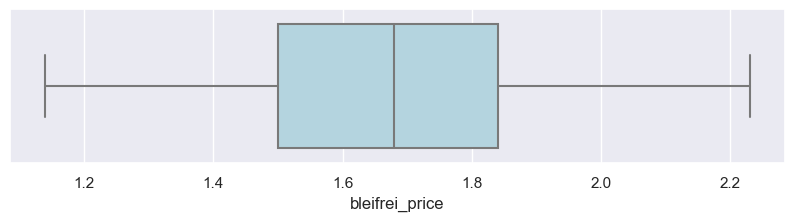

In [239]:
# Boxplot for Bleifrei
plt.figure(figsize=(10,2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['bleifrei_price'], color="lightblue")

<AxesSubplot: xlabel='diesel_price'>

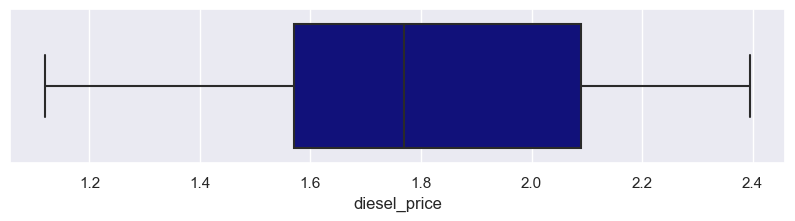

In [240]:
# Boxplot for Diesel
plt.figure(figsize=(10,2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['diesel_price'], color="darkblue")

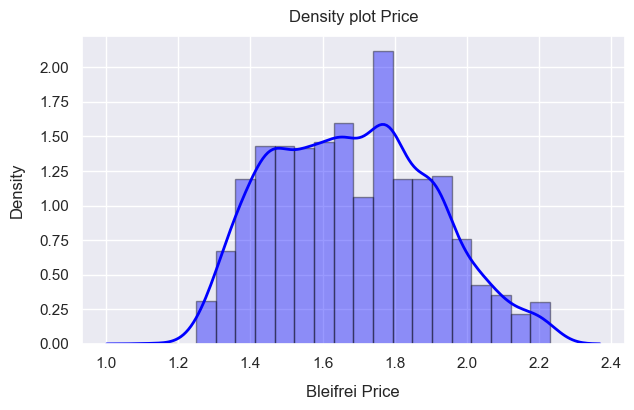

In [241]:
# Density plot
plt.figure(figsize=(7,4))
sns.distplot(df['bleifrei_price'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot Price', fontsize=12, pad=10)
plt.xlabel('Bleifrei Price', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

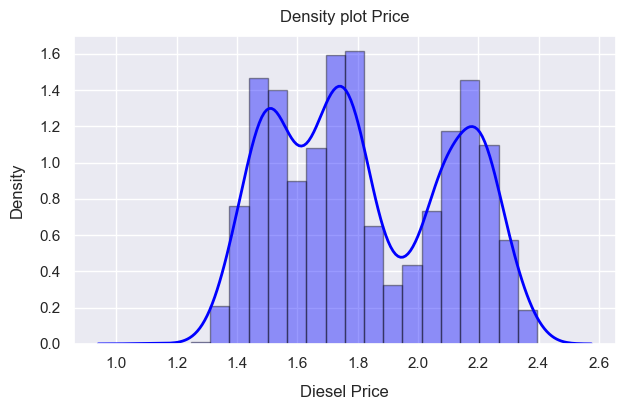

In [242]:
# Density plot Diesel
plt.figure(figsize=(7,4))
sns.distplot(df['diesel_price'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot Price', fontsize=12, pad=10)
plt.xlabel('Diesel Price', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

      bleifrei_price       var
0               1.14 -2.482848
2383            1.25 -1.979728
2404            1.25 -1.979728
2403            1.26 -1.933990
2399            1.26 -1.933990
...              ...       ...
47              2.23  2.502615
95              2.23  2.502615
5               2.23  2.502615
26              2.23  2.502615
3               2.23  2.502615

[2405 rows x 2 columns]


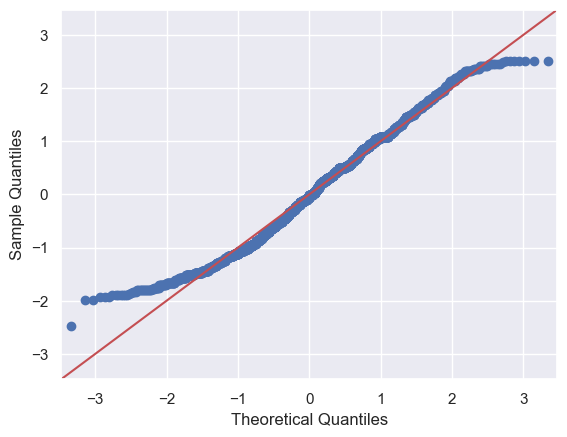

In [243]:
#Quantile-Quantile-Plot
df_qq = df
df_qq['var'] = (df['bleifrei_price']-df['bleifrei_price'].mean()) / df['bleifrei_price'].std()
print(df_qq.sort_values('var')[['bleifrei_price', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45', color = 'lightblue')
py.show() 

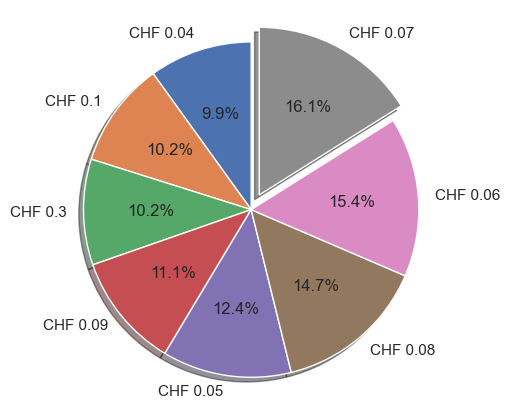

In [244]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.difference.value_counts().nlargest(8).sort_values(ascending=True)

df_bar = df_bar.add_prefix('CHF ')


# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90)
ax1.axis('equal') 

plt.show()

### Multivariate graphical exploratory data analysis (EDA)

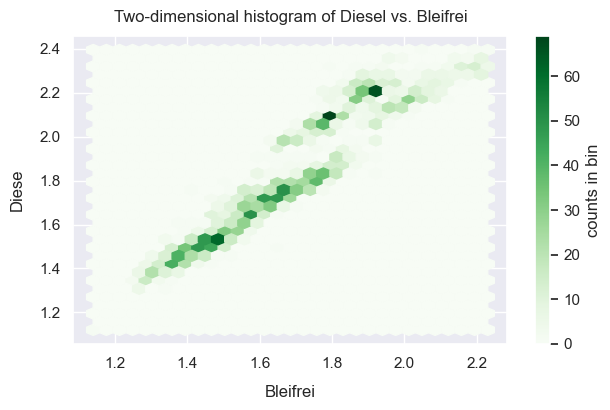

In [245]:
# Hexagonal binning plot
# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df.bleifrei_price, df.diesel_price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('Bleifrei', fontsize=12, labelpad=10)
plt.ylabel('Diese', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of Diesel vs. Bleifrei', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

<AxesSubplot: >

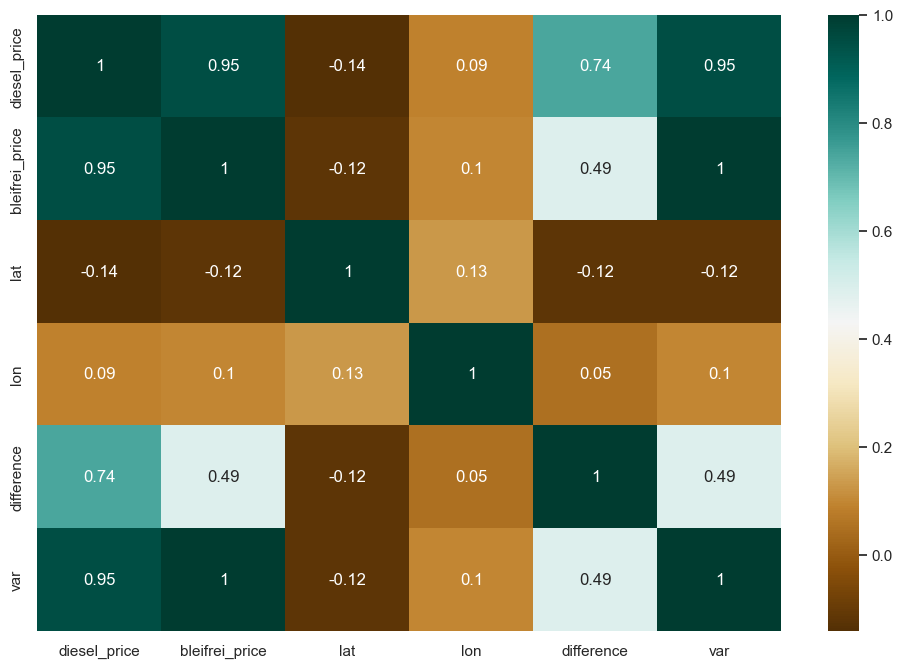

In [246]:
# Set font size for plot
sns.set(font_scale=1)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(12, 8))
corr = df.corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

## 5) Regression

### Simple linear regression (only one explanatory variable in the model) Price_bleifrei ODER Price_Diesel

In [248]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['bleifrei_price'], 
                                                    df['diesel_price'], 
                                                    test_size=0.3, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
2121    1.44
458     2.00
78      2.02
1104    1.73
32      2.15
Name: bleifrei_price, dtype: float64 

y_train:
2121    1.48
458     2.16
78      2.29
1104    1.80
32      2.33
Name: diesel_price, dtype: float64


In [249]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            -0.26
Slope of regression line (beta):          1.239
p-value:                                  0.0000
R-squared (coefficient of determination): 0.8998


Der y-Achsenabschnitt (-0.26) gibt an, wie hoch oder niedrig der Schätzwert für die Ausgabevariable ist, wenn alle Eingabevariablen auf 0 gesetzt werden.
Der Steigungswert (1.239) gibt an, wie sich die Ausgabevariable ändert, wenn sich die Eingabevariable um eine Einheit ändert.
Der p-Wert (0.0000) deutet darauf hin, dass es einen signifikanten Zusammenhang zwischen den Variablen gibt.
Der R-Quadrat-Wert (0.8998) gibt an, wie gut das Modell die Beobachtungen erklärt. Ein hoher R-Quadrat-Wert deutet darauf hin, dass das Modell gut angepasst ist.

### Plot regression line

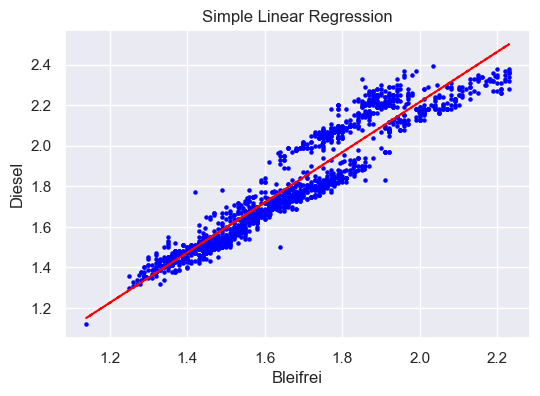

In [250]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept


# Apply myfunc() to x, i.e. make predictions
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, s=5, color='blue')
plt.plot(X_train, mymodel, color='red', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('Bleifrei')
plt.ylabel('Diesel')

plt.show()




In [251]:
### Dieser Graf zeigt das eine schwache korrelation zwischen dem Bleifrei und dem Diesel Preis besteht.
### Jedoch sind die Daten nach oben offen was darauf deutet, das dies nicht ganz akkurat ist.

### Check model residuals (residuals = predicted values minus observed val

In [252]:
# Calculate residuals (here: predicted prices minus observed prices)
residuals = mymodel - y_train

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}') 

1st Predicted price in dataset: 1.52
1st Observed price in dataset: 1.12
1st Residual price in dataset: 0.40


Die Residuen zeigen den Unterschied zwischen vorhergesagtem und beobachtetem Preis. Ein genaues Modell hat kleine Residuen. Um die Genauigkeit eines Modells zu verbessern, kann man Parameter anpassen, mehr Daten sammeln oder ein anderes Modell ausprobieren.

## 6 & 7) Measures of fit and interpretation

For Interpretation of our simple linear regression we use the R-squared value, which should be near 1 if the model should have a high goodness of fit, and the RMSE-value, which indicates how much the model predictions differ on average from the observed values.
Additionally we plot the Histogram of the residuals, with which we can visualize the differencees between the model values and the actual values. 

In [253]:
#R^2
print(f'R-squared (coefficient of determination): {r**2:.4f}')

R-squared (coefficient of determination): 0.8998


In [254]:
#RMSE
MSE = np.square(np.subtract(y_train, mymodel)).mean()

rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

0.37153466656438294


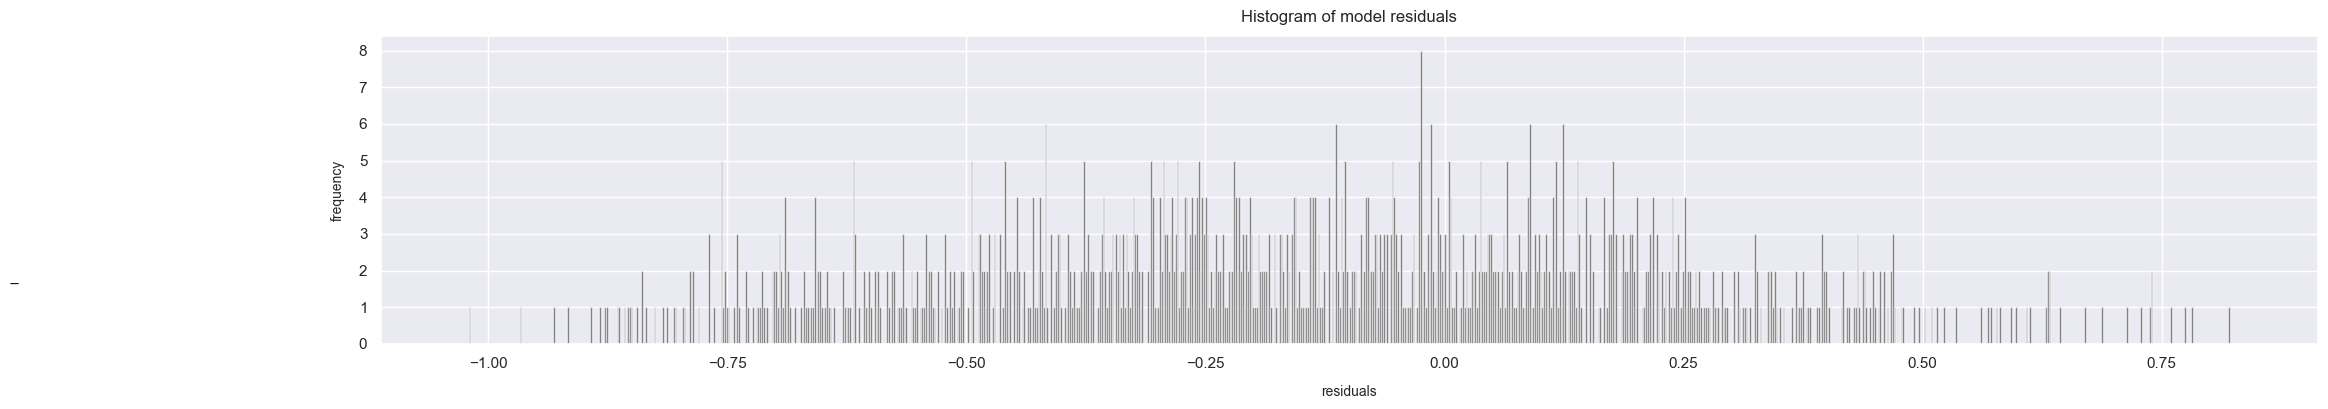

In [255]:
#Histogram of residuals
fig = plt.figure(figsize=(25, 4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=1000, 
                            color='black',
                            alpha=0.6
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Add text annotation
plt.text(-1.5, 1.5, s="--", 
         fontsize=11, 
         color="black")

# Show plot
plt.show()


### Interpretation

SLR-Model in General: The simple linear regression shows a high correlation between the bleifrei price and the diesel price. That means if the bleifrei price goes up, it is very likely that the diesel price goes up as well. 

R-squared: the value is with 0.89 very high --> That means the predicted values of the regression model have a high accuracy to the observed values.
RMSE: The value is 0.40, which means the predicted value differs on average 0.4 from the observed value.
Histogram of model residuals: not done yet

### ANOVA Analysis

H0: the means of the car prices per brand are the same;  
H1: the means of the car prices per brand are not the same   
--> compared will be the three brands: Ferrari, Lamborghini and McLaren

In [256]:
#defining dataframe and remove outliers
df_anova = df[['bleifrei_price', 'diesel_price']]
threshold = 400000
df_anova = df_anova[df_anova['diesel_price'] < threshold]
df_anova.head()

,bleifrei_price,diesel_price
0,1.140,1.120
1,2.035,2.395
2,2.200,2.380
3,2.230,2.380
4,2.220,2.370


In [257]:
###Anova Test 2

In [258]:
count_avia=0
count_agrola=0
count_shell=0

for i in df['brand']:
    if "Avia" in i:
        count_avia = count_avia + 1
    if "Agrola" in i:
        count_agrola = count_agrola + 1
    if "Shell" in i:
        count_shell = count_shell + 1
    
print(count_avia)
print(count_agrola)
print(count_shell)

259
151
142


In [259]:
avia = df.loc[df['brand'].str.contains('Avia')]
agrola = df.loc[df['brand'].str.contains('Agrola')]
shell = df.loc[df['brand'].str.contains('Shell')]

print(avia.shape)
print(agrola.shape)
print(shell.shape)

# Create ANOVA
fvalue, pvalue = stats.f_oneway(avia['difference'],
                                agrola['difference'], 
                                shell['difference'])

print()

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

(259, 9)
(151, 9)
(142, 9)

F-value: 0.813 p-value 0.4442


In [260]:
avia_new = avia[['difference']].assign(brand="avia")
agrola_new = agrola[['difference']].assign(brand="agrola")
shell_new = shell[['difference']].assign(brand="shell")

boxplot = pd.concat([avia_new,agrola_new,shell_new])

boxplot

,difference,brand
6,0.41,avia
8,0.20,avia
27,0.18,avia
86,0.21,avia
103,0.38,avia
...,...,...
2354,0.07,shell
2360,0.01,shell
2361,0.06,shell
2363,0.10,shell


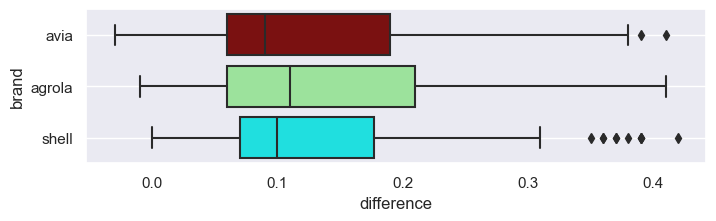

In [261]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="difference",
                 y="brand",
                 palette=['darkred', 'lightgreen', 'cyan'],
                 data=boxplot,
                 orient='h')
plt.grid()
plt.show()

In [262]:
### die nullhypothes kann nicht abgelehnt werden, dies weisst darfau hin das die Preisunterschiede zwischen Benzin und Diesel bei allen Marken gleich sind.

In [263]:
###k-means Clustering

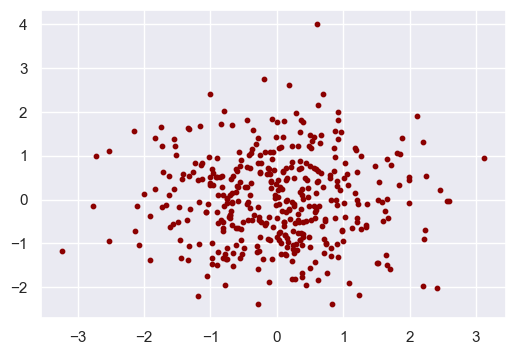

In [264]:
df_k = df.filter(['diesel_price','bleifrei_price'],axis=1)

X, y = make_blobs(n_samples=400, 
                  centers=df_k, 
                  cluster_std=0.8,
                  random_state=42)

# Normalization of the values
X = StandardScaler().fit_transform(X)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], s=10, color='darkred')
plt.show()

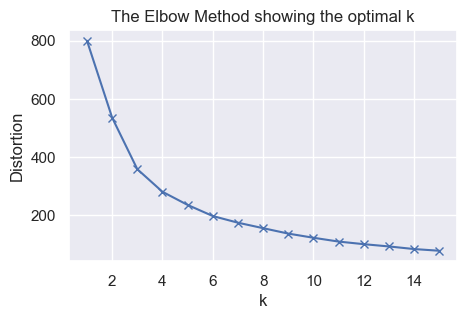

In [265]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,16,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

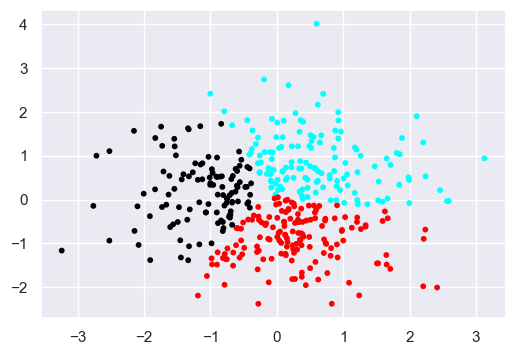

In [266]:
# Number of clusters
k = 3

# k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# List of colors to use for each data point
colors = ['red', 'cyan', 'black', 'magenta']

# Predict the values
y2 = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y2], s=10)
plt.show()

In [267]:
# Print centroids
centroids = kmeans.cluster_centers_
print('Cluster centroids:')
print(centroids, '\n')

# Check the 1st cluster's centroid 'by hand'
clust_00 = X[y2 == 0]
print('The 1st cluster\'s centroid:')
print(f'x = {sum(clust_00[:,0]/len(clust_00[:,0])):.8f}')
print(f'y = {sum(clust_00[:,1]/len(clust_00[:,1])):.8f}')

Cluster centroids:
[[ 0.28654312 -0.90309102]
 [ 0.60480501  0.87756892]
 [-1.14891928  0.17933313]] 

The 1st cluster's centroid:
x = 0.28654312
y = -0.90309102


In [268]:
print(f'Within-cluster sum-of-squares: {kmeans.inertia_:.4f}')

Within-cluster sum-of-squares: 358.5333


In [269]:
def show_silhouette(X, fitted_model):

    import numpy as np
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(fitted_model.labels_)
    num_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, fitted_model.labels_)

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for idx, cls in enumerate(cluster_labels):
        cls_silhouette_vals = silhouette_vals[fitted_model.labels_==cls]
        cls_silhouette_vals.sort()
        y_ax_upper += len(cls_silhouette_vals)
        cmap = cm.get_cmap("Spectral")
        rgba = list(cmap(idx/num_clusters))
        rgba[-1] = 0.7
        plt.barh(
            y=range(y_ax_lower, y_ax_upper), 
            width=cls_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=rgba)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.0)
        y_ax_lower += len(cls_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='orangered', linestyle='--')
    plt.xlabel('silhouette score')
    plt.ylabel('cluster')
    plt.yticks(y_ticks, cluster_labels + 1)
    plt.xlim([0,1])
    plt.show()

k=2, Silhouette Score: 0.3182


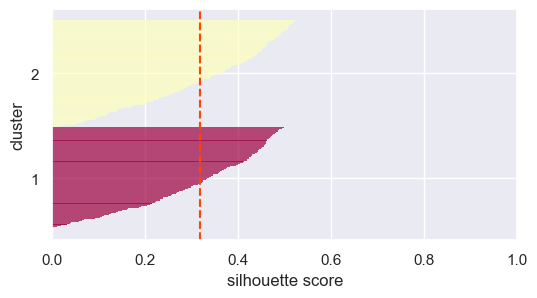

k=3, Silhouette Score: 0.3460


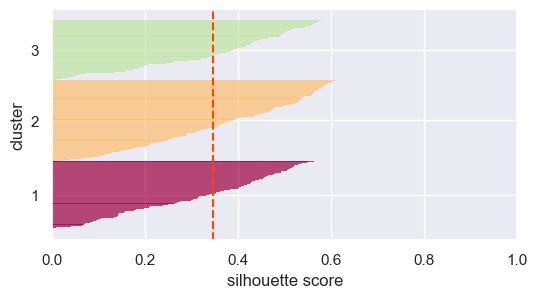

In [270]:

# Create Silhouette plots for different k's
# Note: range(2,12,1) provides: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in [2,3]:
    model = KMeans(n_clusters=i, 
                   random_state=42, 
                   init='random')
    model.fit(X)
    print(f'k={i}, Silhouette Score: {silhouette_score(X, model.labels_):.4f}')
    plt.figure(figsize=(6,3))
    show_silhouette(X=X, fitted_model=model)



### Plot addresses on map

In [271]:
# Create a map centered on a specific location
m = folium.Map(location=[47.49, 8.72], zoom_start=10)
# Add lat/lon of addresses
df_sub = df.dropna()
# Set colors for the 5 biggest brands
colors = ['red', 'blue', 'green', 'purple', 'orange']
# Create a list of the top brands
top_brands = df['brand'].value_counts().nlargest(5).index.tolist()
# Add markers to the map
for i in range(0, len(df_sub)):
    brand = df_sub.iloc[i]['brand']
    if brand in top_brands:
        marker_color = colors[top_brands.index(brand)]
    else:
        marker_color = 'gray'
    folium.Marker(location=(df_sub.iloc[i]['lat'],
                            df_sub.iloc[i]['lon']),
                  popup=df_sub.iloc[i]['address'],
                  icon=folium.Icon(color=marker_color)).add_to(m)
# Create a legend
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 180px; height: 200px; 
     border:2px solid grey; z-index:9999; font-size:14px; background-color: white;
     ">&nbsp; Legend: <br>
     &nbsp; Avia &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:red"></i><br>
     &nbsp; Agrola &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:blue"></i><br>
     &nbsp; Migrol &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:green"></i><br>
     &nbsp; Shell &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:purple"></i><br>
     &nbsp; BP &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:orange"></i><br>
     &nbsp; Others &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:gray"></i>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))
# Display the map
m
